In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
print ("Data shape:", data.shape)

Data shape: (21613, 21)


In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
data.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Skew is: 4.021715573048684


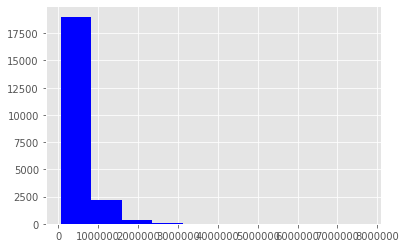

In [10]:
print ("Skew is:", data.price.skew())
plt.hist(data.price, color='blue')
plt.show()

Skew is: 0.4289692719234486


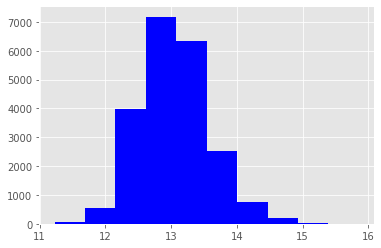

In [12]:
target = np.log(data.price)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [13]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [43]:
corr = numeric_features.corr()
print (corr['price'].sort_values(ascending=False)[:5], '\n')
print (corr['price'].sort_values(ascending=False)[-5:])

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
Name: price, dtype: float64 

yr_built     0.053982
condition    0.036392
long         0.021571
id          -0.016797
zipcode     -0.053168
Name: price, dtype: float64


In [16]:
data1 = data.select_dtypes(include=[np.number]).interpolate().dropna()

In [18]:
sum(data1.isnull().sum() != 0)

0

In [27]:
y = np.log(data1.price)
X = data1.drop(['price','id'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [29]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [30]:
model = lr.fit(X_train, y_train)

In [31]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.7717097954164356


In [32]:
predictions = model.predict(X_test)
print(predictions)

[12.967868   13.4699321  14.0553849  ... 13.14665674 13.08933334
 12.75567229]


In [36]:
feats = data.select_dtypes(
        include=[np.number]).drop(['id','price'], axis=1).interpolate()

In [37]:
predictions = model.predict(feats)

In [38]:
final_predictions = np.exp(predictions)

In [40]:
print ("Final predictions are: \n", final_predictions[:5])

Final predictions are: 
 [274791.67172207 624711.01464773 417292.91200686 406665.07421081
 416835.18027159]


In [41]:
submission = pd.DataFrame()
submission['Id'] = data.id

In [42]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,7129300520,274791.671722
1,6414100192,624711.014648
2,5631500400,417292.912007
3,2487200875,406665.074211
4,1954400510,416835.180272
